# Corresponding

In [15]:
import sys
sys.path.append('..')

In [16]:
import numpy
import scipy.signal
import matplotlib.pyplot
import matplotlib.cm
import pathlib
import PIL.Image

In [17]:
matplotlib.pyplot.rcParams.update({'font.size': 22})

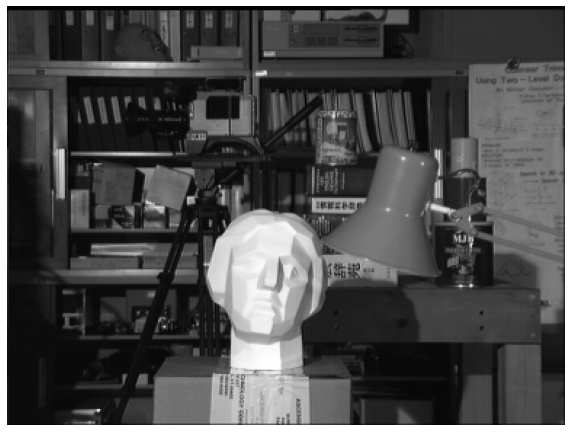

In [18]:
# Open image and convert to grayscale
path: pathlib.Path = pathlib.Path('./images/tsukuba/scene1.row3.col1.ppm')
img = numpy.array(PIL.Image.open(str(path)).convert('L'))

figure = matplotlib.pyplot.figure(figsize=(10, 10))

matplotlib.pyplot.axis('off')
# matplotlib.pyplot.title('Image I')
_ = matplotlib.pyplot.imshow(img, cmap=matplotlib.cm.gray)

## Write function to detect interst points

In [19]:
# import eagle.points.response

# def find_interest_points(
#     img: numpy.ndarray, 
#     size_neigh: int, 
#     epsilon: float
# ) -> numpy.ndarray:
#     r = eagle.points.response.kitchen_rosenfeld(img)
#     rp = eagle.points.response.remove_non_maxima(r, size_neigh)
#     points = eagle.points.response.select_with_threshold(rp, epsilon)
#     return points

## Find interset points and compute differentials invariants

In [20]:
from eagle.points.response import \
    (
        kitchen_rosenfeld,
        remove_non_maxima,
        select_with_threshold
    )

from eagle.points.descriptor.differential import DifferentialInvariant

class ImageFeatures:

    def __init__(self, img: numpy.ndarray):

        self.img = img

        # Find interest points
        r = kitchen_rosenfeld(self.img)
        rp = remove_non_maxima(r, size_neigh=3)
        self.interest_points = select_with_threshold(rp, epsilon=0.3)

        # self.nb_points = self.interest_points.shape[1]
        
        # Compute differential invaraint vector
        self.differential_invariant = DifferentialInvariant(self.img)

In [21]:
imgs: list[numpy.ndarray] = [img, img]

img_features: list[ImageFeatures] = []

for img in imgs:
    img_features.append(ImageFeatures(img))

## Find corresponding

### Compute scores between differential invaraints

In [37]:
def symmetric_indices(i, j) -> tuple[int, int]:
    return (i, j) if j >= i else (j, i)

In [38]:
import eagle.points.descriptor.distance

def compute_score(feature_1: ImageFeatures, feature_2: ImageFeatures) -> numpy.ndarray:

    """ For each interest point from first feature, we compare interest point \n
    from second feature with the distance between differential invariant vector
    """
    
    nb_pts_1 = feature_1.interest_points.shape[0]
    nb_pts_2 = feature_2.interest_points.shape[0]

    score = numpy.zeros(shape=(nb_pts_1, nb_pts_2))

   

    for i in range(0, nb_pts_1):

        pt_i = tuple(feature_1.interest_points[i])
        vec_i = feature_1.differential_invariant[pt_i]
        
        for j in range(0, nb_pts_2):

            pt_j = tuple(feature_1.interest_points[j])
            vec_j = feature_1.differential_invariant[pt_j]
            distance = eagle.points.descriptor.distance.euclidean(vec_i, vec_j)

            score[i, j] = distance

    return score

In [39]:
nb_imgs = len(imgs)

# Sym Matrix : idx_i, idx_j = i, j if j <= i else j, i
scores = numpy.zeros(shape=(nb_imgs, nb_imgs), dtype=numpy.ndarray)


for i in range(0, nb_imgs):
    features_i = img_features[i]
    for j in range(i+1, nb_imgs):
        features_j = img_features[i]
        scores[symmetric_indices((i, j))] = compute_score(features_i, features_j)        

(2, 2)


### Find best corresponding

In [ ]:
nb_imgs = len(imgs)

EPSILON_DISTANCE = 0.001


# Find j such as we have a maximum of corresponding
# for i
# corresp = list[tuple[int, numpy.ndarray]] = []

# corresp[i] index interest pts between i and j
corresp_img = numpy.empty(shape=nb_imgs, dtype=int)

corresp_pts = numpy.empty(shape=nb_imgs, dtype=numpy.ndarray)

for i in range(0, nb_imgs):

    best_pts: numpy.ndarray = corresp_pts[i]
    
    for j in range(i+1, nb_imgs):
        
        score_ij: numpy.ndarray = scores[symmetric_indices(i, j)]
        tmp = numpy.array(numpy.where(score_ij <= EPSILON_DISTANCE))

        if (best_pts is None) or (best_pts.shape[0] < tmp.shape[1]):
            best_pts = numpy.copy(tmp)
            corresp_img[i] = j
            corresp_pts[i] = tmp

            

## Compute homography

In [4]:
import numpy

numpy.where(numpy.array([[0, 0], [0, 0]]) <= 1)


# Ortogonal regression
# Error varaible estimastion
# Total Least Squares

numpy.empty(shape=3, dtype=numpy.ndarray)

array([None, None, None], dtype=object)

In [97]:
import numpy
ij = numpy.array(
    [
        [8.3439058171745160e+01, 3.9043662271609115e+01],
        [8.3586419753086403e+01, 7.1055261312278859e+01],
        [8.2210252727334861e+01, 2.5787845966349073e+02],
        [8.1801443179097788e+01, 2.8886518678703118e+02],
        [1.0984965715570684e+02, 6.3208884909560226e+01],
        [1.0920333912015022e+02, 1.6481596306083208e+02],
        [1.0826182446074708e+02, 2.6580010064461953e+02],
        [1.9382238979515063e+02, 3.8608419735621922e+01],
        [1.9277659792756745e+02, 1.6584636008778438e+02],
        [1.9215537754306766e+02, 2.9327602811115213e+02],
        [2.4589094080229816e+02, 2.3327981417837645e+01],
        [2.4363060428849903e+02, 3.1131599564699832e+02]
    ]
)


XY = numpy.array(
    [
        [0.0000000000000000e+00, 0.0000000000000000e+00],
        [0.0000000000000000e+00, 4.5000000000000000e+00],
        [0.0000000000000000e+00, 3.1500000000000000e+01],
        [0.0000000000000000e+00, 3.6000000000000000e+01],
        [1.8000000000000000e+01, 4.5000000000000000e+00],
        [1.8000000000000000e+01, 1.8000000000000000e+01],
        [1.8000000000000000e+01, 3.1500000000000000e+01],
        [6.0000000000000000e+01, 4.5000000000000000e+00],
        [6.0000000000000000e+01, 1.8000000000000000e+01],
        [6.0000000000000000e+01, 3.1500000000000000e+01],
        [7.8000000000000000e+01, 4.5000000000000000e+00],
        [7.8000000000000000e+01, 3.1500000000000000e+01]
    ]
)



In [98]:
homography_estimation(ij, XY, normalization=True)

hartley_m1 = [[ 0.01191906  0.         -1.71498205]
 [ 0.          0.01191906 -1.96966698]
 [ 0.          0.          1.        ]]
pts1 (hartley) = [[-0.72046677 -1.50430315]
 [-0.71871035 -1.12275493]]
D = [[-0.72046677 -1.50430315  1.        ]
 [ 0.          0.          0.        ]
 [-0.71871035 -1.12275493  1.        ]]
D.T @ D = [[ 6.55576702e+00 -2.77408555e-02 -2.66453526e-15]
 [-2.77408555e-02  2.03280247e+01  1.77635684e-15]
 [-2.66453526e-15  1.77635684e-15  1.20000000e+01]]
3


array([[-2.72301007e-01, -1.90250564e-03,  2.28520491e+01],
       [-2.13325463e-02, -5.29729245e-02,  3.90491726e+00],
       [-1.23876999e-03, -7.60194463e-06, -2.60520274e-01]])